# Penyeimbangan dataset (SMOTE, ADASYN)

# Download data, simpan di MYSQL

Dataset mengenai **protein localization sites** tersedia di sebuah repository. Pada halaman repository tersebut ditampilkan ringkasan informasi, meliputi: karakteristik dataset (multivariate), bidang ilmu (biologi), jenis tugas (klasifikasi), jumlah data (336 instance), jumlah atribut (7 fitur), serta keterangan bahwa tidak ada missing values. Untuk memperoleh dataset, pengguna dapat menekan tombol **DOWNLOAD (5.5 KB)** di sisi kanan halaman. File yang diunduh berbentuk teks atau CSV, sehingga dapat langsung dimanfaatkan untuk analisis maupun pemodelan machine learning.


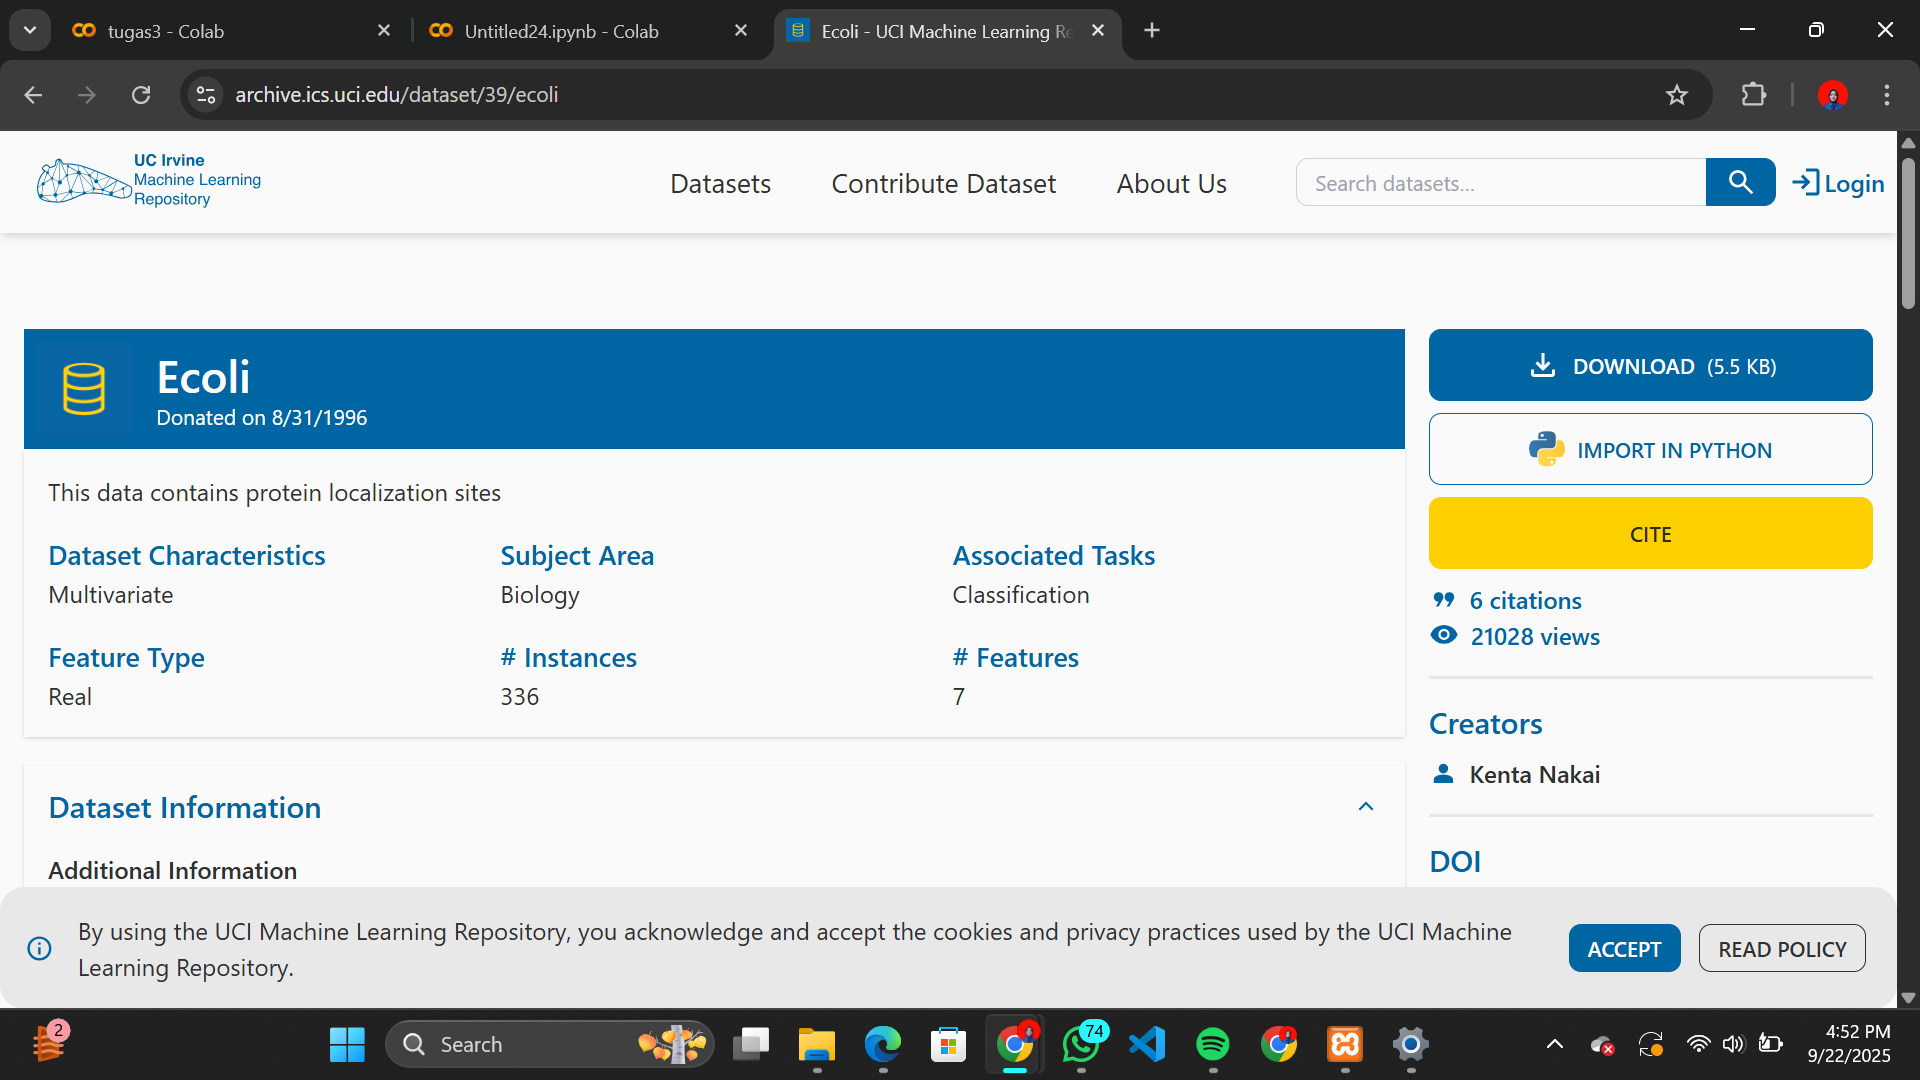

Gambar berikut menunjukkan tampilan phpMyAdmin saat melakukan proses impor dataset **Ecoli** (format .csv) ke dalam MySQL. Setelah dataset diunduh dari UCI Repository, tahap selanjutnya adalah memasukkan file tersebut ke database MySQL melalui langkah-langkah berikut:

1. Login ke phpMyAdmin → pilih database yang akan dipakai (contoh: *ecoli\_dataset*).
2. Klik menu **Impor**.
3. Pada bagian *Berkas untuk impor*, tekan **Choose File** lalu pilih file *ecoli\_dataset.sql* yang telah diunduh.
4. Pastikan *Set karakter berkas* diatur ke **utf-8** agar data dapat terbaca dengan benar.
5. Pada bagian *Format*, pilih **SQL**.
6. Gulir ke bawah dan klik tombol **Go** untuk memulai proses impor.

Setelah selesai, MySQL akan membuat tabel berisi data dari file sql tersebut. Jika file sql tidak mencantumkan struktur tabel (misalnya nama kolom), maka Anda perlu menyesuaikan pengaturan, seperti *Fields terminated by* (contohnya `,` untuk koma), serta menentukan nama tabel atau kolom secara manual. Dengan cara ini, dataset dari UCI sudah siap digunakan dalam query SQL, analisis data, maupun integrasi ke aplikasi.


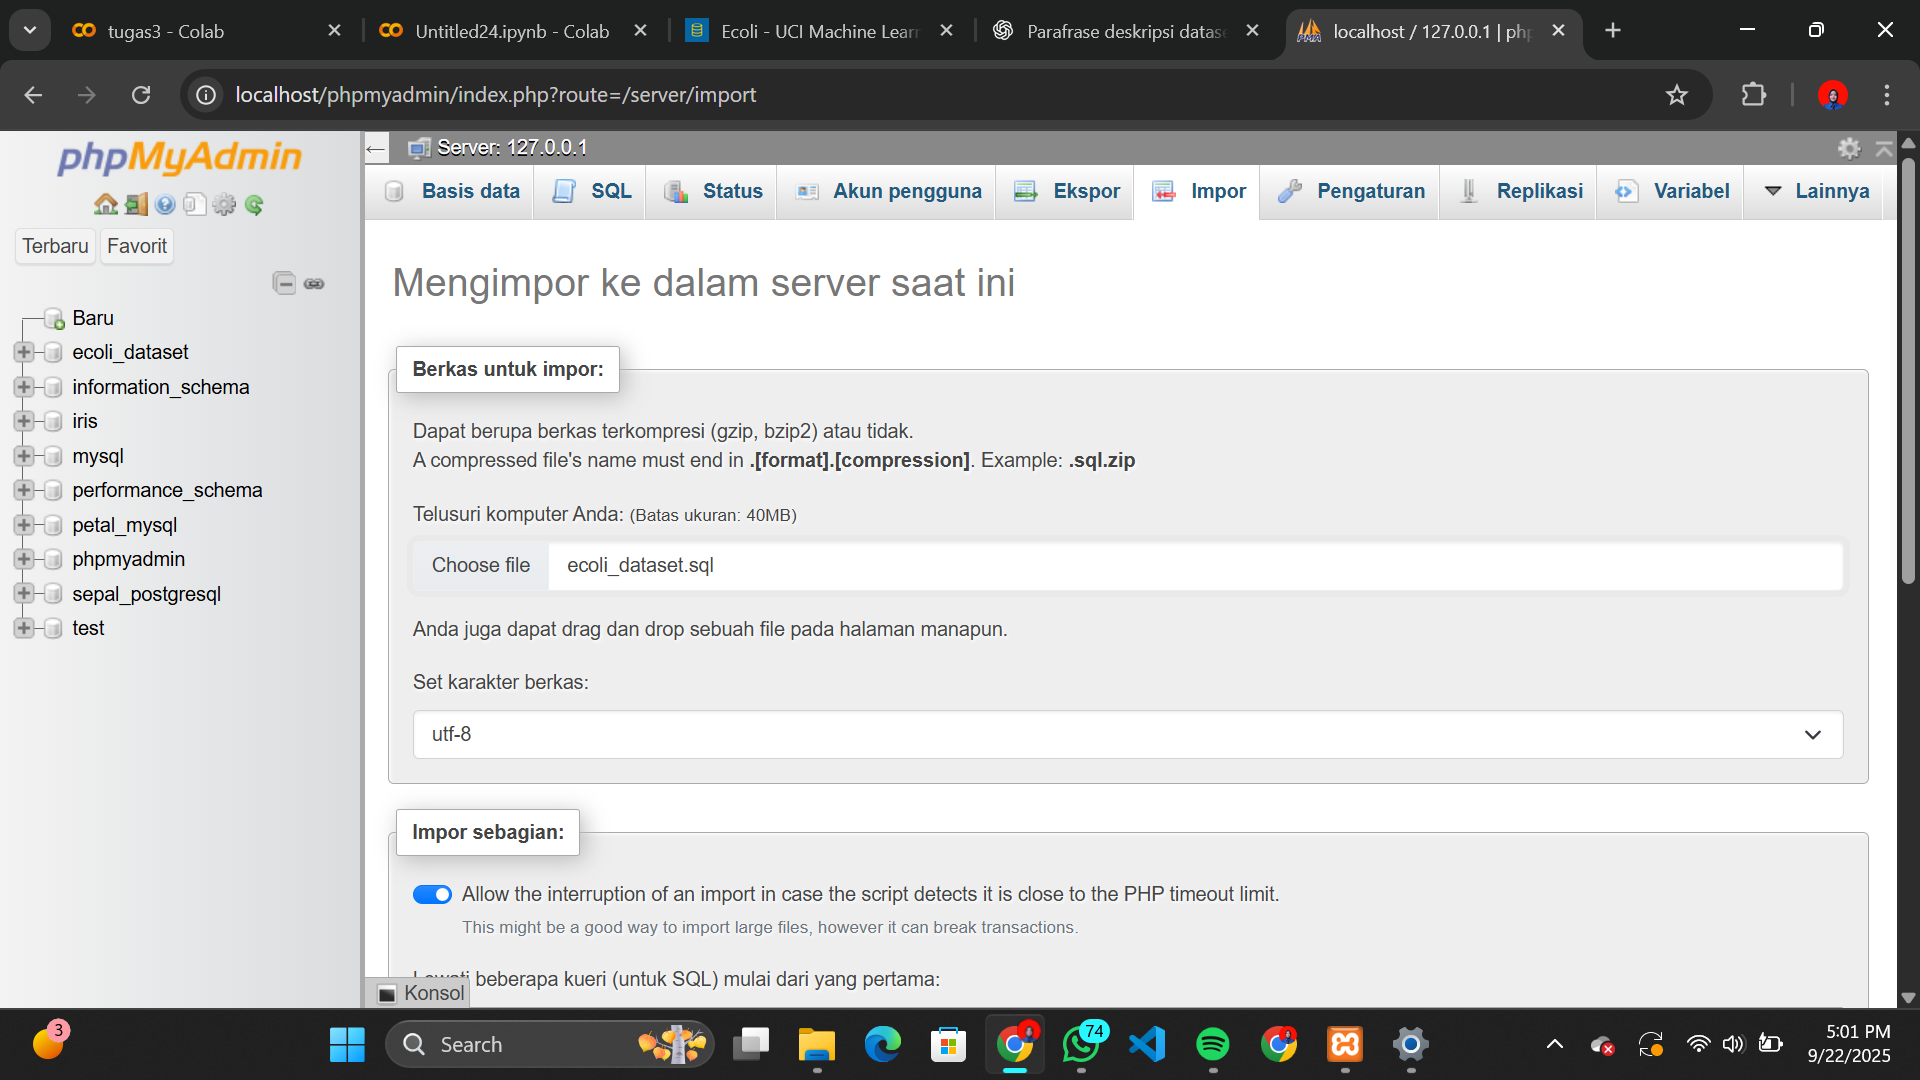

# Installing library

In [8]:
pip install mysql-connector-python imbalanced-learn scikit-learn matplotlib seaborn


# Menghubungkan dan menginisialisasi dataset awal

Kode Python berikut digunakan untuk mengunduh dataset **Ecoli** dari *UCI Machine Learning Repository* dan menyimpannya ke dalam DataFrame menggunakan pustaka **pandas**. Pada bagian awal, dimuat beberapa library yang dibutuhkan, antara lain **pandas**, **numpy**, **matplotlib**, **seaborn**, modul dari **scikit-learn** (StandardScaler, PCA), serta **ADASYN** dari *imbalanced-learn* untuk menangani ketidakseimbangan data. Selain itu, terdapat pula **sqlalchemy** yang akan dipakai untuk melakukan koneksi ke database MySQL. Variabel konfigurasi database seperti `MYSQL_USER`, `MYSQL_PASS`, `MYSQL_HOST`, `MYSQL_PORT`, dan `MYSQL_DB` sudah disiapkan agar proses penyimpanan data ke MySQL lebih mudah.

Selanjutnya, kode mendefinisikan URL dataset (*ecoli.data*) beserta daftar nama kolom sesuai dokumentasi UCI, yaitu atribut **mcg, gvh, lip, chg, aac, alm1, alm2**, serta **class** sebagai label kelas. Dataset kemudian dibaca menggunakan `pd.read_csv()` dengan parameter `sep=r"\s+"` karena pemisah data berupa spasi/tab. Hasil pembacaan disimpan dalam DataFrame bernama `df`, lalu ditampilkan ukuran data dengan `df.shape` dan lima baris pertamanya melalui `df.head()`. Langkah ini dilakukan untuk memastikan dataset berhasil diunduh dan terbaca dengan benar sebelum masuk ke tahap berikutnya, seperti analisis PCA, visualisasi, maupun penyeimbangan data menggunakan ADASYN.


In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
from sqlalchemy import create_engine


MYSQL_USER = "root"
MYSQL_PASS = ""
MYSQL_HOST = "127.0.0.1"
MYSQL_PORT = 3306
MYSQL_DB   = "ecoli_dataset"
TABLE_NAME = "ecoli_dataset"

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data"

col_names = ["seq_name", "mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2", "class"]

df = pd.read_csv(url, header=None, sep=r"\s+", names=col_names)
print("Shape:", df.shape)
print(df.head())


Shape: (336, 9)
     seq_name   mcg   gvh   lip  chg   aac  alm1  alm2 class
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35    cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44    cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46    cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36    cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35    cp


# Visualisasi Data dengan PCA

Kode tersebut digunakan untuk melakukan eksplorasi dan visualisasi dataset **Ecoli** dengan dua pendekatan.

Pertama, dibuat **pairplot** menggunakan *seaborn* untuk sejumlah fitur numerik utama (mcg, gvh, lip, chg, aac, alm1, alm2) dengan label kelas sebagai *hue*. Pada plot ini, bagian diagonal menampilkan distribusi masing-masing fitur, sementara bagian luar diagonal menunjukkan *scatter plot* yang menggambarkan hubungan antar fitur. Visualisasi ini memberikan gambaran awal mengenai pola data, korelasi antar atribut, serta bagaimana kelas Ecoli tersebar di ruang fitur asli sebelum dilakukan reduksi dimensi.

Kedua, data dinormalisasi dengan **StandardScaler** agar seluruh fitur berada pada skala yang sama, kemudian dilakukan **Principal Component Analysis (PCA)** untuk mereduksi data ke dua dimensi (PC1 dan PC2). Hasil transformasi PCA dimasukkan ke dalam DataFrame baru bernama `df_plot`, lalu divisualisasikan dalam bentuk *scatter plot*. Setiap titik mewakili satu sampel, dengan pewarnaan sesuai kelas. Visualisasi PCA ini mempermudah pengamatan pola dan pemisahan antar kelas pada ruang dua dimensi, serta memungkinkan perbandingan dengan sebaran asli dari pairplot, khususnya untuk melihat adanya tumpang tindih atau pembentukan cluster dari tiap kelas.


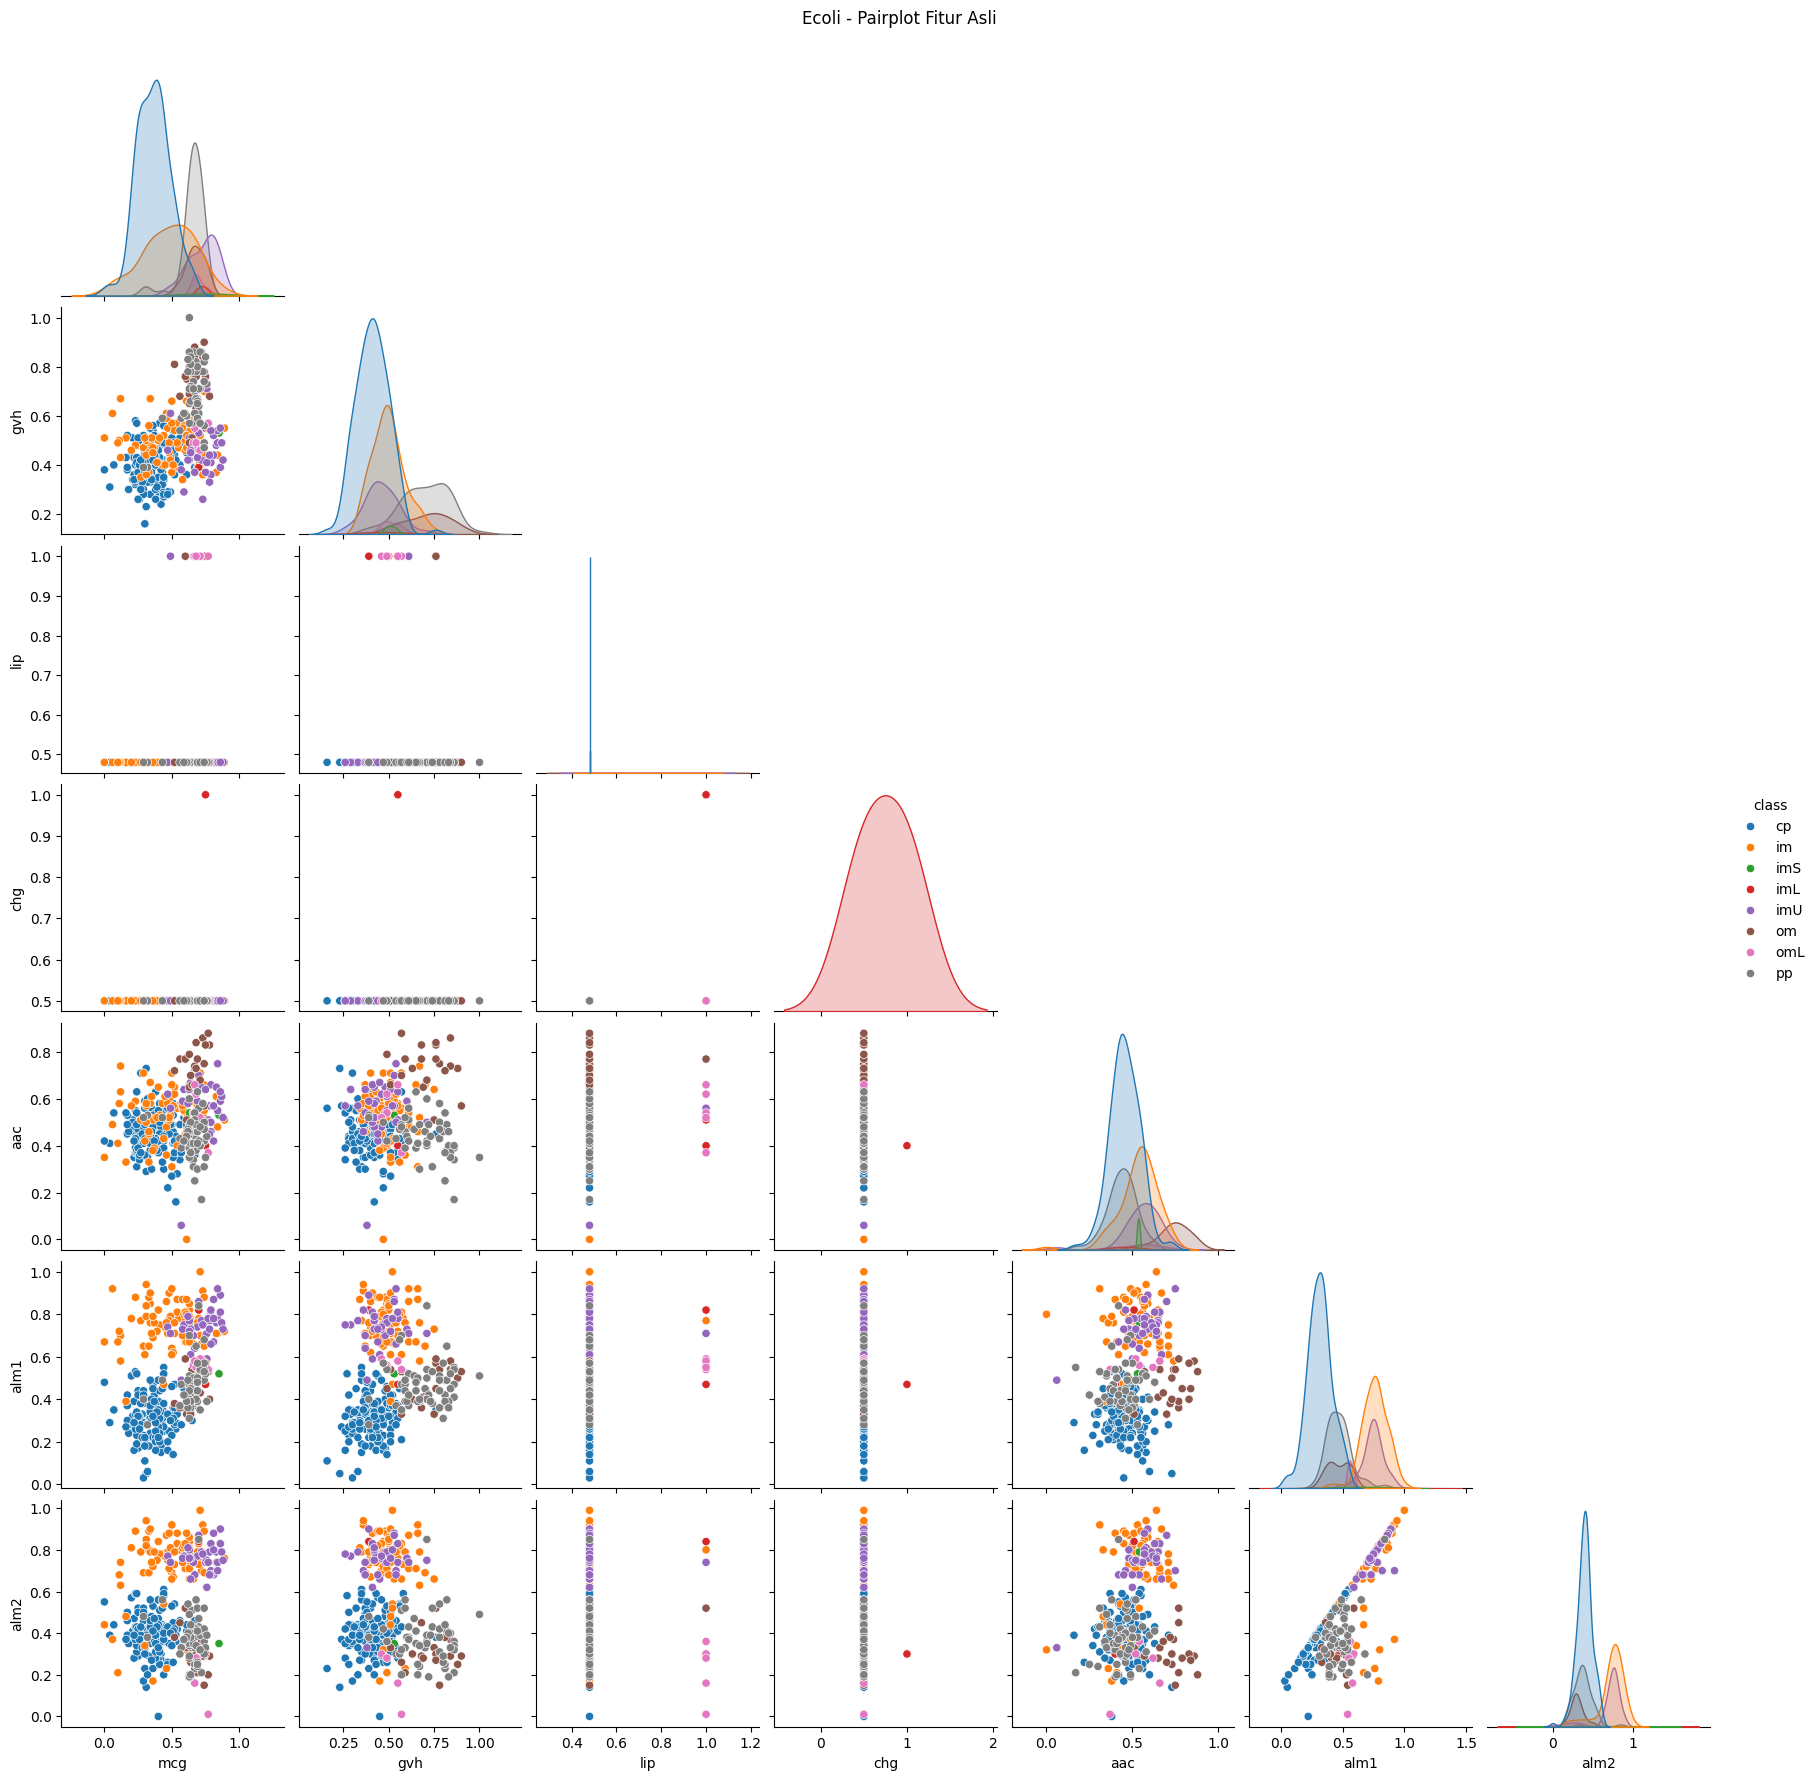

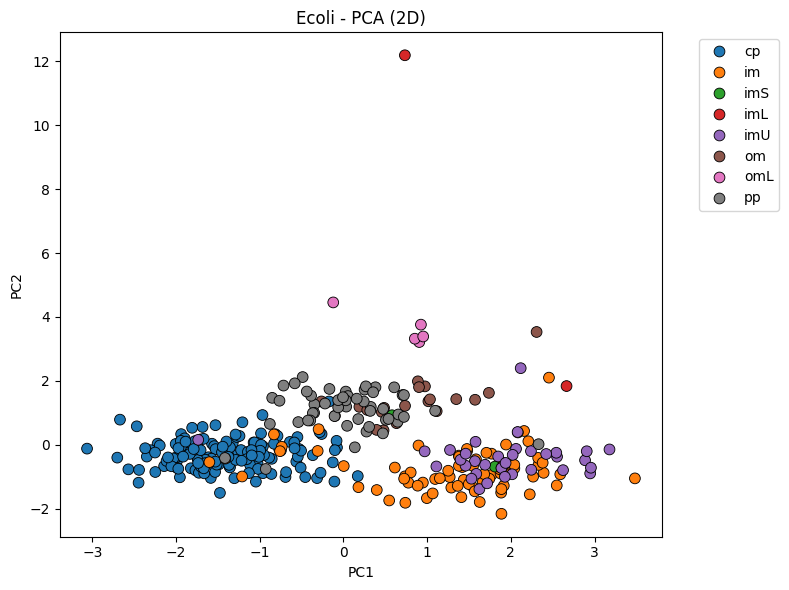

/tmp/ipython-input-1978870701.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="tab10")


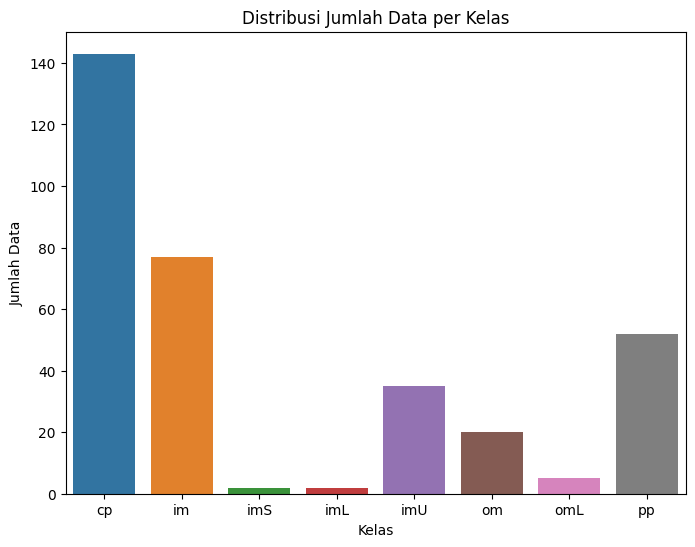


Tabel Jumlah Data per Kelas:
Kelas  Jumlah
   cp     143
   im      77
   pp      52
  imU      35
   om      20
  omL       5
  imL       2
  imS       2


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]
X = df[features]
y = df["class"]

df_pair = X.copy()
df_pair["class"] = y
sns.pairplot(df_pair, hue="class", corner=True, diag_kind="kde", palette="tab10")
plt.suptitle("Ecoli - Pairplot Fitur Asli", y=1.02)
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame({
    "PC1": X_pca[:,0],
    "PC2": X_pca[:,1],
    "class": y
})

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x="PC1", y="PC2", hue="class", palette="tab10", s=60, edgecolor="k")
plt.title("Ecoli - PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x=y, palette="tab10")
plt.title("Distribusi Jumlah Data per Kelas")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()

class_counts = y.value_counts().reset_index()
class_counts.columns = ["Kelas", "Jumlah"]

print("\nTabel Jumlah Data per Kelas:")
print(class_counts.to_string(index=False))


# Penyeimbangan Data

## SMOTE

Potongan kode berikut digunakan untuk melakukan penyeimbangan kelas pada dataset **Ecoli** dengan metode **SMOTE (Synthetic Minority Oversampling Technique)**. Pertama, ditentukan fitur numerik utama sebagai **X** dan label kelas sebagai **y**. SMOTE dijalankan dengan parameter `k_neighbors=1` agar tidak menimbulkan error pada kelas minoritas yang memiliki jumlah sampel sangat sedikit. Proses `fit_resample` dari SMOTE menghasilkan **X\_res** dan **y\_res**, yaitu dataset baru dengan distribusi kelas yang lebih seimbang. Untuk memverifikasi hasil oversampling, jumlah sampel per kelas ditampilkan sebelum dan sesudah balancing menggunakan `pd.Series.value_counts()`.

Selanjutnya, kode memberi penanda pada data sintetis yang dihasilkan SMOTE dengan cara membandingkan setiap baris pada **X\_res** dengan data asli **X**. Fungsi `rows_to_keys` digunakan untuk mengubah setiap baris menjadi string unik berdasarkan nilai fitur yang sudah dibulatkan, sehingga memungkinkan perbandingan yang akurat. Variabel **is\_synthetic** berupa nilai boolean yang menunjukkan apakah suatu baris merupakan sampel hasil sintesis SMOTE (`True`) atau data asli (`False`). Dengan cara ini, jumlah data baru yang ditambahkan dapat diketahui, yang berguna untuk analisis lanjutan maupun visualisasi, misalnya ketika membuat scatter plot PCA dengan penanda khusus untuk sampel sintetis.


Before balancing: {'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imL': 2, 'imS': 2}
After  balancing: {'cp': 143, 'im': 143, 'imS': 143, 'imL': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143}
Jumlah sampel resampled: 1144
Jumlah synthetic terdeteksi: 808


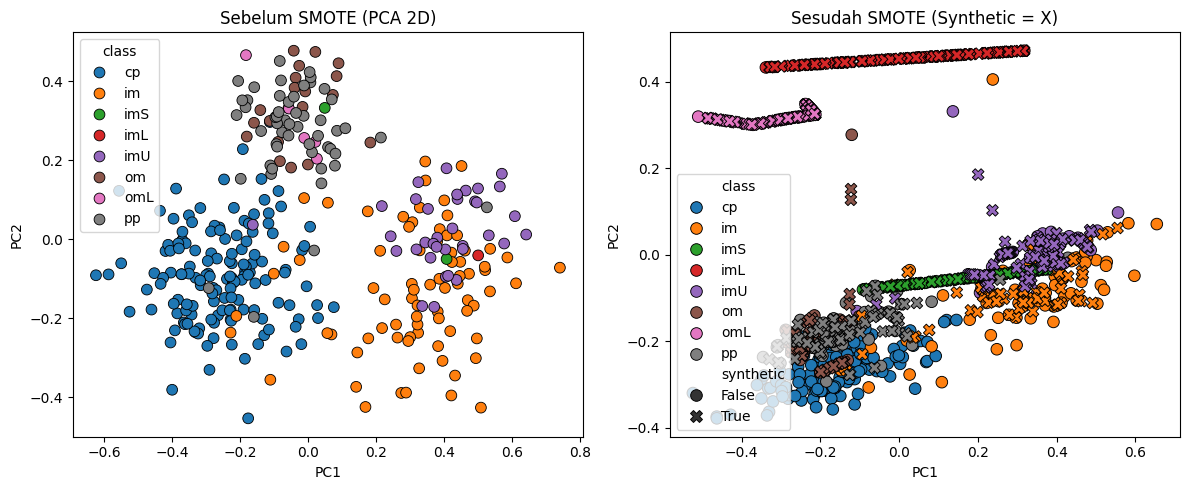

/tmp/ipython-input-1214527919.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="tab10", ax=axes[0])
/tmp/ipython-input-1214527919.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_res, palette="tab10", ax=axes[1])


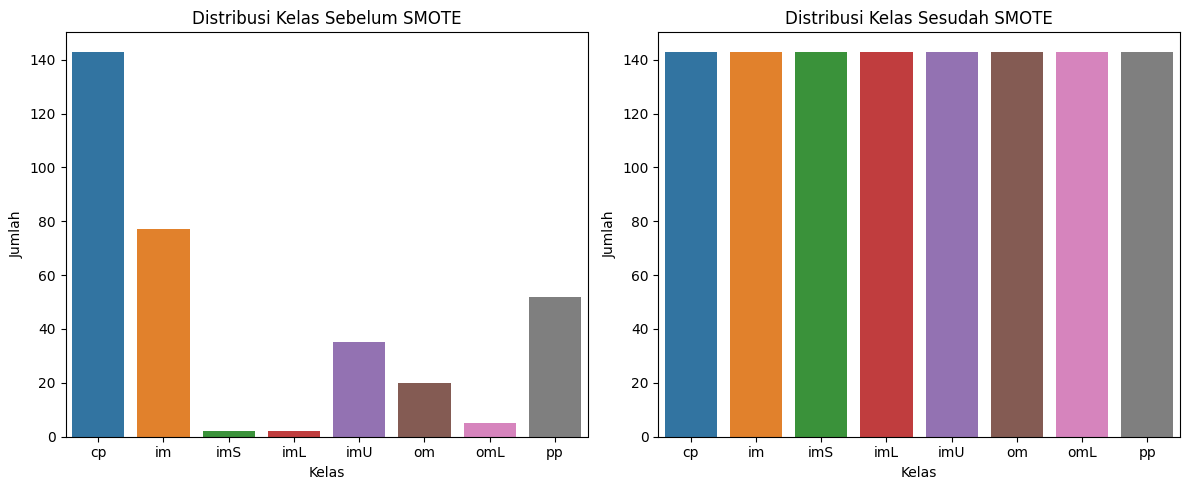

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

features = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]
X = df[features].values
y = df["class"].values

smote = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X, y)

print("Before balancing:", pd.Series(y).value_counts().to_dict())
print("After  balancing:", pd.Series(y_res).value_counts().to_dict())

def rows_to_keys(arr):
    arr_rounded = np.round(arr.astype(float), 8)
    keys = ["|".join(map(str, row)) for row in arr_rounded]
    return np.array(keys)

orig_keys = rows_to_keys(X)
res_keys  = rows_to_keys(X_res)
orig_key_set = set(orig_keys.tolist())
is_synthetic = np.array([k not in orig_key_set for k in res_keys])

print("Jumlah sampel resampled:", len(X_res))
print("Jumlah synthetic terdeteksi:", is_synthetic.sum())

pca = PCA(n_components=2, random_state=42)

X_pca_before = pca.fit_transform(X)
X_pca_after  = pca.fit_transform(X_res)

df_before = pd.DataFrame({
    "PC1": X_pca_before[:,0],
    "PC2": X_pca_before[:,1],
    "class": y
})

df_after = pd.DataFrame({
    "PC1": X_pca_after[:,0],
    "PC2": X_pca_after[:,1],
    "class": y_res,
    "synthetic": is_synthetic
})

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data=df_before, x="PC1", y="PC2", hue="class", palette="tab10", s=60, edgecolor="k")
plt.title("Sebelum SMOTE (PCA 2D)")

plt.subplot(1,2,2)
sns.scatterplot(data=df_after, x="PC1", y="PC2", hue="class", style="synthetic",
                palette="tab10", markers={False:"o", True:"X"}, s=70, edgecolor="k")
plt.title("Sesudah SMOTE (Synthetic = X)")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x=y, palette="tab10", ax=axes[0])
axes[0].set_title("Distribusi Kelas Sebelum SMOTE")
axes[0].set_xlabel("Kelas")
axes[0].set_ylabel("Jumlah")

sns.countplot(x=y_res, palette="tab10", ax=axes[1])
axes[1].set_title("Distribusi Kelas Sesudah SMOTE")
axes[1].set_xlabel("Kelas")
axes[1].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()


## ADASYN
Potongan kode berikut memperlihatkan **pendekatan gabungan untuk menyeimbangkan dataset** Ecoli yang memiliki kelas dengan jumlah sampel sangat sedikit. Langkah pertama menggunakan **SMOTE** dengan parameter `k_neighbors=1` untuk memperbanyak data pada kelas ultra-minoritas, sehingga tiap kelas memiliki jumlah sampel minimum yang memadai. Hasil resampling disimpan dalam variabel `X_sm` dan `y_sm`, kemudian distribusi jumlah sampel per kelas ditampilkan dengan `pd.Series.value_counts()` untuk memantau penambahan data sintetis dari SMOTE.

Setelah kelas ultra-minoritas memperoleh cukup representasi, proses dilanjutkan dengan **ADASYN** pada dataset hasil SMOTE. ADASYN juga dijalankan dengan `n_neighbors=1` agar dapat bekerja dengan aman pada kelas yang jumlah sampelnya sangat terbatas. Algoritma ini menghasilkan sampel sintetis secara adaptif, menyesuaikan dengan distribusi kelas mayoritas di sekitar data minoritas. Outputnya berupa `X_ada` dan `y_ada`, dengan distribusi jumlah kelas yang kembali ditampilkan untuk memastikan keseimbangan. Dengan kombinasi ini, dataset menjadi lebih proporsional dan dapat digunakan pada tahap analisis lanjutan maupun visualisasi, seperti PCA untuk mengamati sebaran data asli dan sintetis.


Setelah SMOTE: {'cp': 143, 'im': 143, 'imS': 143, 'imL': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143}
Setelah SMOTE+ADASYN: {'cp': 143, 'im': 143, 'imS': 143, 'imL': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143}


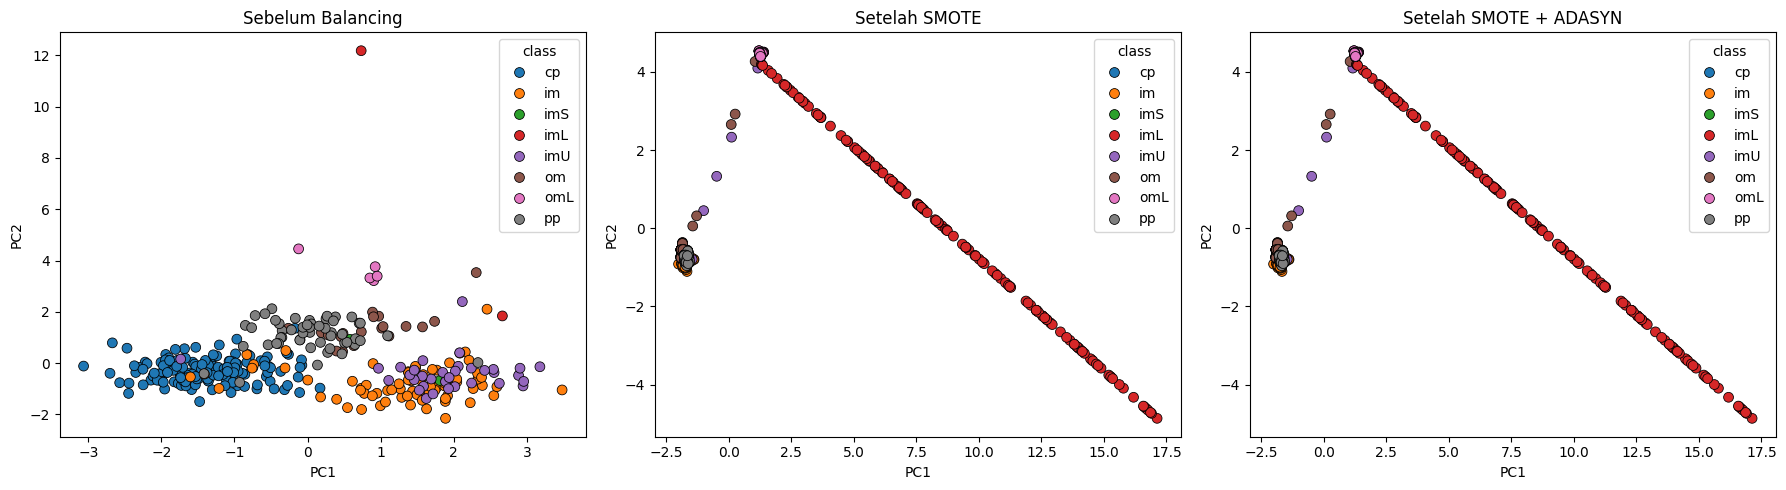

/tmp/ipython-input-3754100580.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="tab10", ax=axes[0])
/tmp/ipython-input-3754100580.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_sm, palette="tab10", ax=axes[1])
/tmp/ipython-input-3754100580.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_ada, palette="tab10", ax=axes[2])


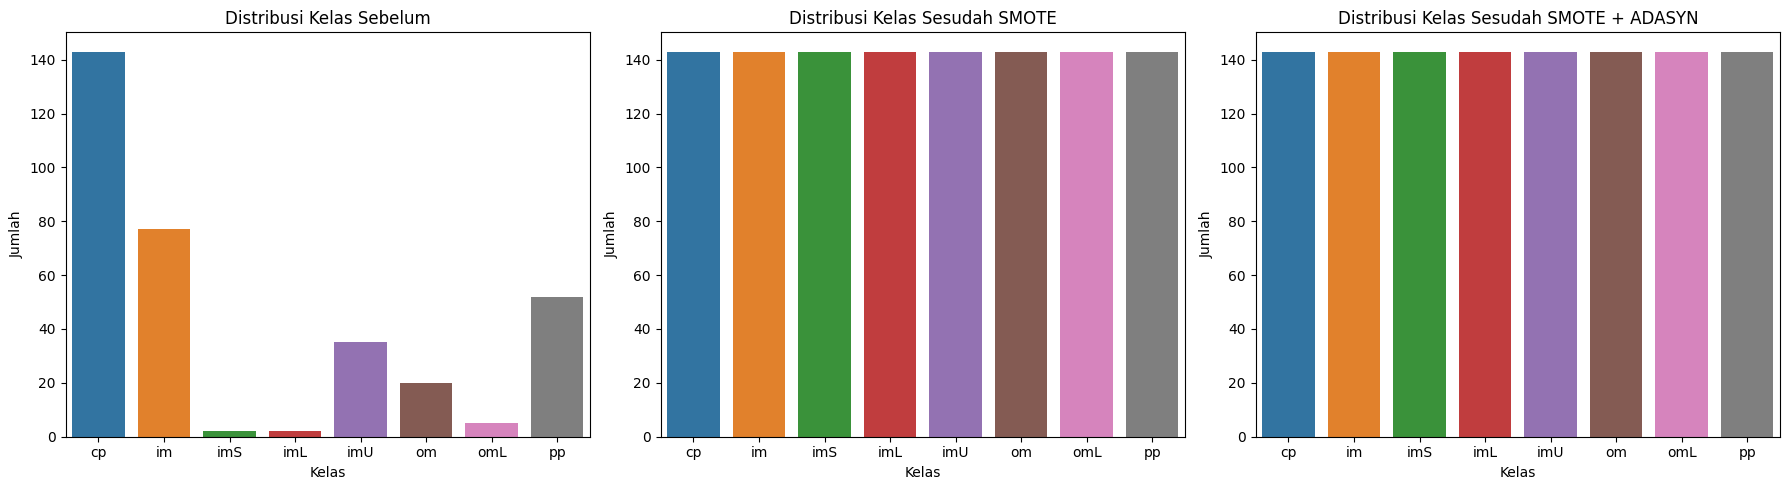

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE, ADASYN

smote = SMOTE(random_state=42, k_neighbors=1)
X_sm, y_sm = smote.fit_resample(X_scaled, y)
print("Setelah SMOTE:", pd.Series(y_sm).value_counts().to_dict())

adasyn = ADASYN(random_state=42, n_neighbors=1)
X_ada, y_ada = adasyn.fit_resample(X_sm, y_sm)
print("Setelah SMOTE+ADASYN:", pd.Series(y_ada).value_counts().to_dict())

pca = PCA(n_components=2, random_state=42)
X_pca_before = pca.fit_transform(X_scaled)
X_pca_sm     = pca.fit_transform(X_sm)
X_pca_ada    = pca.fit_transform(X_ada)

df_before = pd.DataFrame({"PC1":X_pca_before[:,0], "PC2":X_pca_before[:,1], "class":y})
df_sm     = pd.DataFrame({"PC1":X_pca_sm[:,0],     "PC2":X_pca_sm[:,1],     "class":y_sm})
df_ada    = pd.DataFrame({"PC1":X_pca_ada[:,0],    "PC2":X_pca_ada[:,1],    "class":y_ada})

fig, axes = plt.subplots(1,3, figsize=(18,5))

sns.scatterplot(data=df_before, x="PC1", y="PC2", hue="class", palette="tab10", s=50, edgecolor="k", ax=axes[0])
axes[0].set_title("Sebelum Balancing")

sns.scatterplot(data=df_sm, x="PC1", y="PC2", hue="class", palette="tab10", s=50, edgecolor="k", ax=axes[1])
axes[1].set_title("Setelah SMOTE")

sns.scatterplot(data=df_ada, x="PC1", y="PC2", hue="class", palette="tab10", s=50, edgecolor="k", ax=axes[2])
axes[2].set_title("Setelah SMOTE + ADASYN")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1,3, figsize=(18,5))

sns.countplot(x=y, palette="tab10", ax=axes[0])
axes[0].set_title("Distribusi Kelas Sebelum")
axes[0].set_xlabel("Kelas")
axes[0].set_ylabel("Jumlah")

sns.countplot(x=y_sm, palette="tab10", ax=axes[1])
axes[1].set_title("Distribusi Kelas Sesudah SMOTE")
axes[1].set_xlabel("Kelas")
axes[1].set_ylabel("Jumlah")

sns.countplot(x=y_ada, palette="tab10", ax=axes[2])
axes[2].set_title("Distribusi Kelas Sesudah SMOTE + ADASYN")
axes[2].set_xlabel("Kelas")
axes[2].set_ylabel("Jumlah")

plt.tight_layout()
plt.show()


# Visualisasi data akhir

Kode ini berfungsi untuk **memvisualisasikan dataset Ecoli yang telah melalui proses penyeimbangan** dengan bantuan PCA dua dimensi. Pertama, data hasil oversampling (`X_res`) dinormalisasi menggunakan `StandardScaler` agar seluruh fitur berada pada skala yang seragam. Setelah itu, **PCA** diterapkan untuk mereduksi data menjadi dua komponen utama (`PC1` dan `PC2`), sehingga distribusi sampel dapat divisualisasikan dalam ruang dua dimensi. Hasil transformasi disimpan pada `df_res_plot`, yang juga menyertakan penanda untuk membedakan sampel sintetis (`is_synthetic`) yang dihasilkan metode oversampling seperti ADASYN.

Langkah berikutnya membuat scatter plot dengan `seaborn`, di mana sampel asli divisualisasikan sebagai titik berwarna sesuai kelas, sedangkan data sintetis ditandai dengan marker `x` berwarna hitam. Visualisasi ini membantu melihat pola, pemisahan, dan sebaran antara data asli dengan sampel hasil generasi ADASYN. Grafik kemudian dilengkapi dengan judul, label sumbu, serta legenda agar lebih informatif, dan dapat disimpan menggunakan `plt.savefig` untuk kebutuhan dokumentasi atau pelaporan.


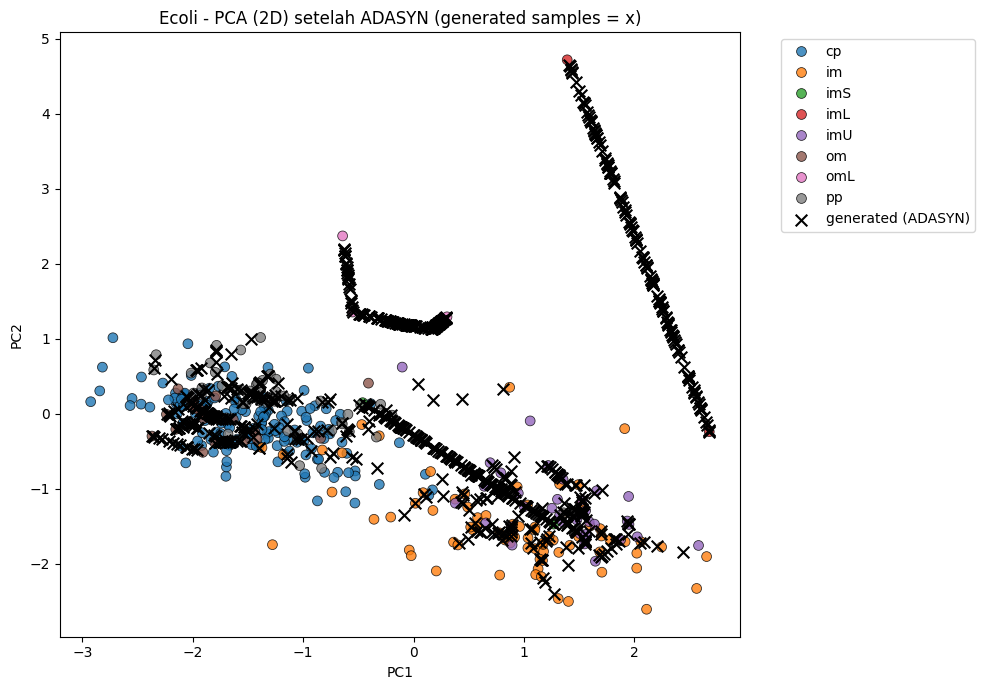

<Figure size 640x480 with 0 Axes>

In [13]:
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

pca_res = PCA(n_components=2, random_state=42)
X_res_pca = pca_res.fit_transform(X_res_scaled)

df_res_plot = pd.DataFrame({
    "PC1": X_res_pca[:,0],
    "PC2": X_res_pca[:,1],
    "class": y_res,
    "is_synthetic": is_synthetic
})

plt.figure(figsize=(10,7))
# plot data asli
sns.scatterplot(data=df_res_plot[df_res_plot["is_synthetic"]==False],
                x="PC1", y="PC2", hue="class", palette="tab10",
                s=50, edgecolor="k", alpha=0.8)

# plot data synthetic
synthetic = df_res_plot[df_res_plot["is_synthetic"]==True]
plt.scatter(synthetic["PC1"], synthetic["PC2"],
            marker="x", s=70, c="black", label="generated (ADASYN)")

plt.title("Ecoli - PCA (2D) setelah ADASYN (generated samples = x)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

# Optional: save plots
plt.savefig("ecoli_pca_original.png", dpi=200)
plt.savefig("ecoli_pca_adasyn.png", dpi=200)


Kode berikut digunakan untuk **menampilkan visualisasi efek penyeimbangan kelas pada dataset Ecoli** melalui tiga tahap: data asli, setelah SMOTE, serta setelah kombinasi SMOTE + ADASYN. Pertama, data fitur dinormalisasi menggunakan `StandardScaler`, lalu dilakukan reduksi dimensi dengan **PCA** menjadi dua komponen utama (`PC1` dan `PC2`). Sebuah fungsi bernama `get_synthetic_mask` dibuat untuk menandai sampel sintetis yang dihasilkan metode oversampling dengan cara membandingkan data hasil resampling terhadap data asli. Setiap tahap kemudian disimpan dalam DataFrame terpisah, dengan kolom `is_synthetic` untuk menunjukkan apakah suatu baris merupakan data buatan.

Visualisasi dilakukan dalam satu figure yang terdiri dari tiga subplot. Scatter plot pertama menampilkan distribusi data asli sesuai kelas, scatter plot kedua memperlihatkan hasil dari SMOTE dengan sampel sintetis ditandai menggunakan marker hitam `x`, sementara scatter plot ketiga menampilkan hasil kombinasi SMOTE + ADASYN dengan format yang sama. Melalui visualisasi ini, dapat diamati bagaimana data minoritas diperbanyak, distribusi kelas menjadi lebih seimbang, serta dampak metode oversampling terhadap pola data setelah reduksi PCA.


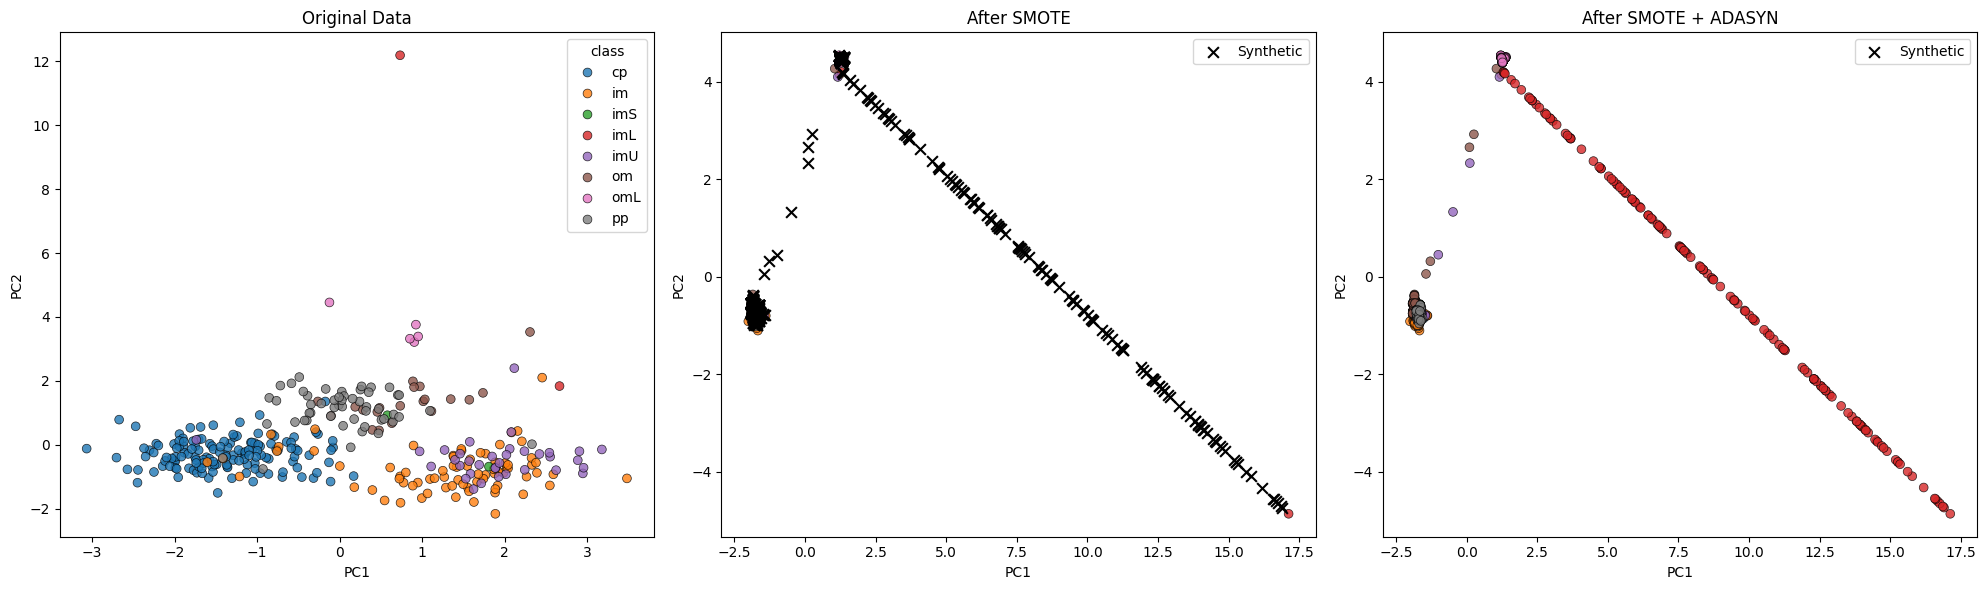

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE, ADASYN
import numpy as np
import pandas as pd

features = ["mcg", "gvh", "lip", "chg", "aac", "alm1", "alm2"]
X = df[features].values
y = df["class"].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def get_synthetic_mask(X_orig, X_res):
    orig_keys = set(map(tuple, np.round(X_orig, 8)))
    res_keys  = list(map(tuple, np.round(X_res, 8)))
    return np.array([k not in orig_keys for k in res_keys])

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_orig = pd.DataFrame({
    "PC1": X_pca[:,0],
    "PC2": X_pca[:,1],
    "class": y,
    "is_synthetic": False
})

smote = SMOTE(random_state=42, k_neighbors=1)
X_sm, y_sm = smote.fit_resample(X_scaled, y)

mask_smote = get_synthetic_mask(X_scaled, X_sm)

X_sm_pca = pca.fit_transform(X_sm)
df_sm = pd.DataFrame({
    "PC1": X_sm_pca[:,0],
    "PC2": X_sm_pca[:,1],
    "class": y_sm,
    "is_synthetic": mask_smote
})

adasyn = ADASYN(random_state=42, n_neighbors=1)
X_ada, y_ada = adasyn.fit_resample(X_sm, y_sm)

mask_ada = get_synthetic_mask(X_sm, X_ada)

X_ada_pca = pca.fit_transform(X_ada)
df_ada = pd.DataFrame({
    "PC1": X_ada_pca[:,0],
    "PC2": X_ada_pca[:,1],
    "class": y_ada,
    "is_synthetic": mask_ada
})

fig, axes = plt.subplots(1, 3, figsize=(20,6))

# Original
sns.scatterplot(data=df_orig, x="PC1", y="PC2", hue="class",
                s=40, alpha=0.8, edgecolor="k", ax=axes[0])
axes[0].set_title("Original Data")

# SMOTE
sns.scatterplot(data=df_sm[df_sm["is_synthetic"]==False],
                x="PC1", y="PC2", hue="class",
                s=40, alpha=0.8, edgecolor="k", ax=axes[1], legend=False)
synthetic = df_sm[df_sm["is_synthetic"]==True]
axes[1].scatter(synthetic["PC1"], synthetic["PC2"],
                c="black", marker="x", s=60, label="Synthetic")
axes[1].set_title("After SMOTE")
axes[1].legend()

# SMOTE + ADASYN
sns.scatterplot(data=df_ada[df_ada["is_synthetic"]==False],
                x="PC1", y="PC2", hue="class",
                s=40, alpha=0.8, edgecolor="k", ax=axes[2], legend=False)
synthetic = df_ada[df_ada["is_synthetic"]==True]
axes[2].scatter(synthetic["PC1"], synthetic["PC2"],
                c="black", marker="x", s=60, label="Synthetic")
axes[2].set_title("After SMOTE + ADASYN")
axes[2].legend()

plt.tight_layout()
plt.show()


# KLASIFIKASI

## Naive Bayes

Kode berikut digunakan untuk mengevaluasi performa model Naive Bayes pada tiga kondisi berbeda: data asli (tanpa balancing), data hasil oversampling menggunakan SMOTE, serta data yang diolah lebih lanjut dengan ADASYN. Proses dimulai dengan membagi dataset menjadi data latih dan data uji menggunakan train_test_split dengan stratifikasi agar proporsi kelas tetap seimbang. Selanjutnya, model Gaussian Naive Bayes dilatih (fit) dan diuji (predict) untuk memperoleh nilai akurasi. Tahapan ini dilakukan pada ketiga jenis data sehingga memungkinkan perbandingan performa model sebelum dan sesudah penerapan balancing.

Nilai akurasi dari masing-masing skenario kemudian disimpan dalam sebuah DataFrame dan divisualisasikan dalam bentuk diagram batang menggunakan Seaborn. Visualisasi ini menampilkan perbandingan akurasi Naive Bayes pada dataset Asli, SMOTE, dan ADASYN, sehingga terlihat apakah teknik oversampling mampu meningkatkan hasil klasifikasi dibandingkan dengan data asli yang cenderung tidak seimbang. Dengan demikian, kode ini memberikan pemahaman yang lebih jelas mengenai dampak metode penyeimbangan data terhadap kinerja algoritma klasifikasi.

### Data Asli

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc_before = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes - Data Asli :", acc_before)



Akurasi Naive Bayes - Data Asli : 0.7821782178217822


### Data SMOTE

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm
)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc_smote = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes - Data SMOTE :", acc_smote)

Akurasi Naive Bayes - Data SMOTE : 0.8226744186046512


### Data ADASYN

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ada, y_ada, test_size=0.3, random_state=42, stratify=y_ada
)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc_adasyn = accuracy_score(y_test, y_pred)
print("Akurasi Naive Bayes - Data ADASYN :", acc_adasyn)

Akurasi Naive Bayes - Data ADASYN : 0.8226744186046512


### Visualisasi akurasi data

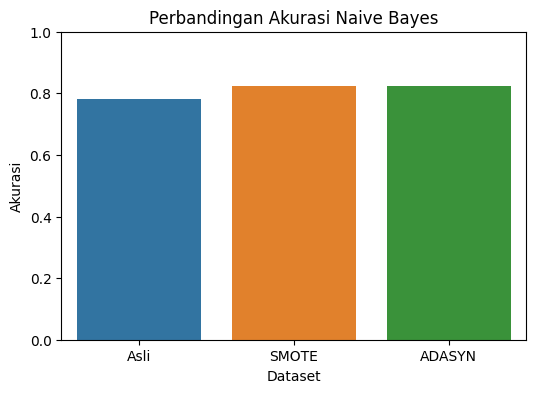

In [18]:
results = pd.DataFrame({
    "Dataset": ["Asli", "SMOTE", "ADASYN"],
    "Akurasi": [acc_before, acc_smote, acc_adasyn]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=results, x="Dataset", y="Akurasi", hue="Dataset", palette="tab10", legend=False)
plt.title("Perbandingan Akurasi Naive Bayes")
plt.ylabel("Akurasi")
plt.xlabel("Dataset")
plt.ylim(0, 1)
plt.show()

## Random Forest

Kode berikut digunakan untuk mengukur performa algoritma Random Forest pada tiga kondisi dataset: data asli sebelum balancing, data hasil oversampling dengan SMOTE, serta data hasil oversampling dengan ADASYN. Langkah awal dilakukan pemisahan data menjadi latih dan uji menggunakan train-test split dengan rasio 70:30, disertai parameter stratify agar distribusi kelas tetap proporsional. Setelah itu, model RandomForestClassifier dilatih (fit) pada data latih dan diuji (predict) pada data uji, kemudian nilai akurasi dihitung menggunakan accuracy_score. Perbandingan akurasi dari ketiga variasi dataset ini menjadi dasar untuk menganalisis sejauh mana teknik balancing memengaruhi performa Random Forest.

Selanjutnya, akurasi dari masing-masing skenario dimasukkan ke dalam sebuah DataFrame dan divisualisasikan dengan Seaborn barplot. Visualisasi ini menampilkan perbandingan akurasi Random Forest pada dataset Asli, SMOTE, dan ADASYN, sehingga dapat dilihat apakah metode oversampling berhasil meningkatkan kinerja klasifikasi, khususnya dalam menghadapi permasalahan ketidakseimbangan kelas. Jika terjadi peningkatan akurasi setelah penerapan SMOTE atau ADASYN, maka dapat disimpulkan bahwa teknik balancing tersebut efektif dalam memperbaiki kualitas model Random Forest pada data yang tidak seimbang.

### Data Asli

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_before = accuracy_score(y_test, y_pred)
print("Akurasi Random Forest - Data Asli :", acc_before)


Akurasi Random Forest - Data Asli : 0.8217821782178217


### Data SMOTE

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_smote = accuracy_score(y_test, y_pred)
print("Akurasi Random Forest - Data SMOTE :", acc_smote)


Akurasi Random Forest - Data SMOTE : 0.9447674418604651


### Data ADASYN

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ada, y_ada, test_size=0.3, random_state=42, stratify=y_ada
)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc_adasyn = accuracy_score(y_test, y_pred)
print("Akurasi Random Forest - Data ADASYN :", acc_adasyn)


Akurasi Random Forest - Data ADASYN : 0.9447674418604651


### Visualisasi akurasi data Random Forest

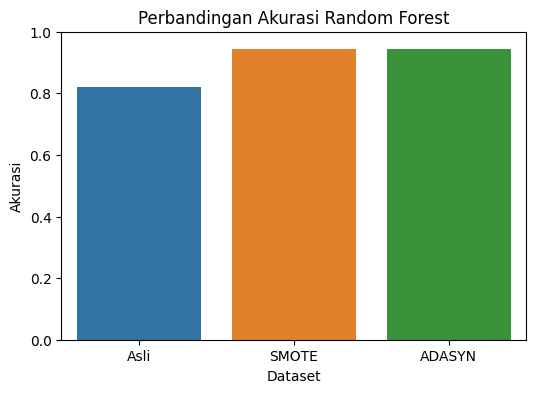

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results = pd.DataFrame({
    "Dataset": ["Asli", "SMOTE", "ADASYN"],
    "Akurasi": [acc_before, acc_smote, acc_adasyn]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=results, x="Dataset", y="Akurasi", hue="Dataset", palette="tab10", legend=False)
plt.title("Perbandingan Akurasi Random Forest")
plt.ylabel("Akurasi")
plt.xlabel("Dataset")
plt.ylim(0, 1)
plt.show()


# Ensemble Bagging

Kode berikut memanfaatkan pendekatan Bagging Ensemble Classifier dengan Decision Tree sebagai model dasar untuk mengevaluasi performa klasifikasi pada tiga jenis dataset: data asli, data hasil oversampling menggunakan SMOTE, serta data hasil oversampling dengan ADASYN. Tahap awal dilakukan pembagian data yang telah diskalakan menjadi data latih dan data uji dengan train_test_split menggunakan stratifikasi, sehingga proporsi kelas tetap terjaga. Model Bagging dilatih dengan 100 estimator dan diuji pada data uji untuk memperoleh nilai akurasi awal sebagai baseline.

Untuk mengatasi masalah ketidakseimbangan kelas, dilakukan oversampling pada dataset. Teknik SMOTE menghasilkan data sintetis dengan cara interpolasi pada kelas minoritas, sedangkan ADASYN menghasilkan sampel sintetis yang lebih adaptif mengikuti distribusi kelas minoritas. Kedua dataset hasil oversampling tersebut kemudian dievaluasi kembali menggunakan model Bagging yang sama.

Seluruh hasil akurasi dari ketiga skenario disimpan ke dalam sebuah DataFrame dan divisualisasikan dalam bentuk diagram batang. Visualisasi ini memberikan perbandingan yang lebih jelas, sehingga dapat diamati apakah penggunaan metode oversampling mampu meningkatkan performa klasifikasi Bagging dibandingkan dengan data asli yang tidak seimbang.

### Data Asli

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
acc_before = accuracy_score(y_test, y_pred)
print("Akurasi Bagging - Data Asli :", acc_before)




Akurasi Bagging - Data Asli : 0.8217821782178217


### Data SMOTE

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm
)

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
acc_smote = accuracy_score(y_test, y_pred)
print("Akurasi Bagging - Data SMOTE :", acc_smote)



Akurasi Bagging - Data SMOTE : 0.9331395348837209


### Data ADASYN

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_ada, y_ada, test_size=0.3, random_state=42, stratify=y_ada
)

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
acc_adasyn = accuracy_score(y_test, y_pred)
print("Akurasi Bagging - Data ADASYN :", acc_adasyn)



Akurasi Bagging - Data ADASYN : 0.9331395348837209


### Visualisasi akurasi bagging classifier

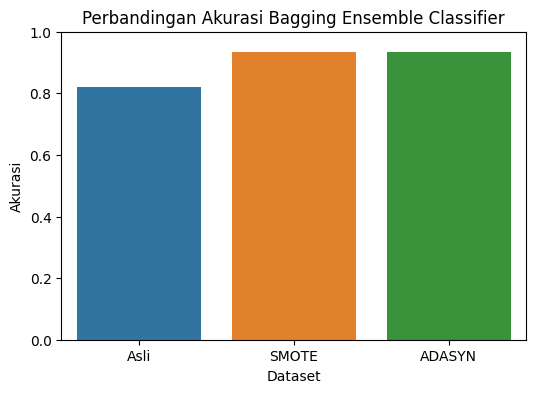

In [26]:
results = pd.DataFrame({
    "Dataset": ["Asli", "SMOTE", "ADASYN"],
    "Akurasi": [acc_before, acc_smote, acc_adasyn]
})

plt.figure(figsize=(6, 4))
sns.barplot(data=results, x="Dataset", y="Akurasi", hue="Dataset", palette="tab10", legend=False)
plt.title("Perbandingan Akurasi Bagging Ensemble Classifier")
plt.ylabel("Akurasi")
plt.xlabel("Dataset")
plt.ylim(0, 1)
plt.show()